In [16]:
import warnings
warnings.filterwarnings('ignore')

# FEMTO Dataset

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)

import seaborn as sns
sns.set_style("white")
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

from hmmlearn import hmm

In [3]:
data = pd.read_csv('Data/s_trn_femto_bear1_1.txt', header = None, sep='\s+').T
data.columns = [0, 1]
data.head()

,0,1
0,0.561746,0.435801
1,0.535112,0.420968
2,0.531158,0.425605
3,0.554833,0.445524
4,0.566652,0.423847


In [4]:
data.describe()

,0,1
count,2803.000000,2803.000000
mean,0.676392,0.479459
std,0.564982,0.314074
min,0.292975,0.318224
25%,0.353237,0.368102
50%,0.487456,0.430632
75%,0.835165,0.485966
max,6.707560,5.119619


[Text(0.5,0,'Time')]

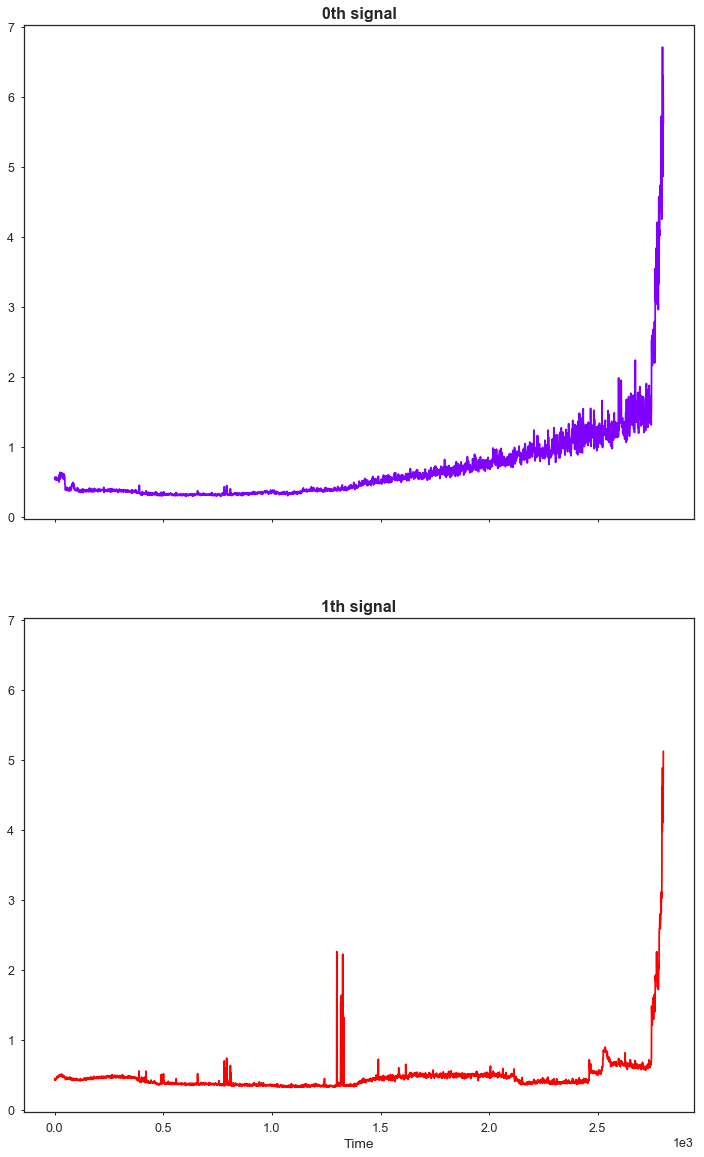

In [5]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 1, 2))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data.index == i
    ax.plot(data.index,
            data[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

In [6]:
X = np.array([[x] for x in data[0].values])
X

array([[0.56174566],
       [0.5351125 ],
       [0.53115825],
       ...,
       [5.1303276 ],
       [6.2973248 ],
       [5.6075621 ]])

In [17]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42, verbose=True).fit(X)

         1       -3179.2328             +nan
         2        -773.3430       +2405.8898
         3        -196.7377        +576.6053
         4         792.3398        +989.0776
         5        1345.4533        +553.1135
         6        1500.0525        +154.5992
         7        1612.2482        +112.1957
         8        1788.9757        +176.7275
         9        1951.9589        +162.9832
        10        2114.5086        +162.5497
        11        2128.0053         +13.4967
        12        2130.9182          +2.9129
        13        2150.6695         +19.7513
        14        2225.3478         +74.6782
        15        2266.1857         +40.8379
        16        2266.8639          +0.6783
        17        2267.2009          +0.3369
        18        2267.3417          +0.1409
        19        2267.3965          +0.0547
        20        2267.4270          +0.0306
        21        2267.4480          +0.0210
        22        2267.4630          +0.0150
        23

In [18]:
# start probability
model.startprob_ = np.array([0.6, 0.3, 0.1])

# transition probability
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

# means
model.means_ = np.array([[0.44], [1.15], [4.11]])
# model.means_ = np.array([[0.44, 0.42], [1.15, 0.52], [4.11, 2.62]])

# covars
model.covars_ = np.tile(np.identity(2), (3, 1, 1)) # 3 -> n_states, 1 -> n_features, 1 -> n_features

In [19]:
model.fit(X)

         1       -3179.2328             +nan
         2        -773.3430       +2405.8898
         3        -196.7377        +576.6053
         4         792.3398        +989.0776
         5        1345.4533        +553.1135
         6        1500.0525        +154.5992
         7        1612.2482        +112.1957
         8        1788.9757        +176.7275
         9        1951.9589        +162.9832
        10        2114.5086        +162.5497
        11        2128.0053         +13.4967
        12        2130.9182          +2.9129
        13        2150.6695         +19.7513
        14        2225.3478         +74.6782
        15        2266.1857         +40.8379
        16        2266.8639          +0.6783
        17        2267.2009          +0.3369
        18        2267.3417          +0.1409
        19        2267.3965          +0.0547
        20        2267.4270          +0.0306
        21        2267.4480          +0.0210
        22        2267.4630          +0.0150
        23

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=1000, params='stmc',
      random_state=42, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

In [22]:
result0, result1, result2 = [], [], []
for x in model.predict(X):
    if x == 0:
        result0.append(x)
    elif x == 1:
        result1.append(x)
    elif x == 2:
        result2.append(x)

In [23]:
model.decode(X)

(2263.681799808781, array([1, 1, 1, ..., 2, 2, 2]))

In [24]:
model.startprob_

array([2.20466428e-161, 1.00000000e+000, 2.04439196e-297])

In [25]:
model.transmat_

array([[9.98460015e-001, 1.53998490e-003, 5.73914523e-288],
       [1.58166378e-003, 9.97631049e-001, 7.87286953e-004],
       [1.70015858e-080, 3.34830456e-022, 1.00000000e+000]])

In [26]:
model.means_

array([[0.35145527],
       [0.77715784],
       [1.97279655]])

In [27]:
model.covars_

array([[[1.00819411e-03]],

       [[5.92615064e-02]],

       [[1.24247098e+00]]])